In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MinMaxScaler
from pycaret.utils import version
version()
from pycaret.time_series import TSForecastingExperiment
import matplotlib.pyplot as plt
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pmdarima.arima.utils import nsdiffs, ndiffs
from keras.models import Sequential
from keras.layers import Dense
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
from statsmodels.tsa.seasonal import STL
from tensorflow.keras.optimizers import Adam
from sklearn.metrics import mean_absolute_percentage_error, mean_absolute_error, mean_squared_error, r2_score
import yfinance as yf
from statsmodels.tsa.stattools import adfuller
from statsmodels.tsa.seasonal import seasonal_decompose
from statsmodels.tsa.holtwinters import ExponentialSmoothing
from pycaret.time_series import *



In [3]:
df_USDT = yf.download(
tickers = ["USDT-USD"],
start = "2020-01-01",
end = "2025-01-02"
)
# Rename columns to remove multi-level indexing
df_USDT.columns = ['Close', 'High', 'Low', 'Open', 'Volume']
df_USDT.shape
df_USDT.info()
print('Null Values:',df_USDT.isnull().values.sum())
print(df_USDT.columns)
df_USDT.reset_index(inplace=True)
df_USDT['Date'] = pd.to_datetime(df_USDT['Date'], format='%Y-%m-%d')
df_USDT = df_USDT[['Date', 'Close']]
df_USDT.head()
# Set the Date column as the index
df_USDT.set_index('Date', inplace=True)
print(df_USDT.index)
df_USDT = df_USDT.asfreq('D')  # Resample to daily frequency
# Verify the frequency of the index
print(f"Frequency of the index: {df_USDT.index.freq}")


[*********************100%***********************]  1 of 1 completed

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 1828 entries, 2020-01-01 to 2025-01-01
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Close   1828 non-null   float64
 1   High    1828 non-null   float64
 2   Low     1828 non-null   float64
 3   Open    1828 non-null   float64
 4   Volume  1828 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 85.7 KB
Null Values: 0
Index(['Close', 'High', 'Low', 'Open', 'Volume'], dtype='object')
DatetimeIndex(['2020-01-01', '2020-01-02', '2020-01-03', '2020-01-04',
               '2020-01-05', '2020-01-06', '2020-01-07', '2020-01-08',
               '2020-01-09', '2020-01-10',
               ...
               '2024-12-23', '2024-12-24', '2024-12-25', '2024-12-26',
               '2024-12-27', '2024-12-28', '2024-12-29', '2024-12-30',
               '2024-12-31', '2025-01-01'],
              dtype='datetime64[ns]', name='Date', length=1828, freq=None)
Frequency of the ind

In [4]:

exp_USDT = TSForecastingExperiment()
exp_USDT.setup(data=df_USDT, target='Close', fh=365, session_id=123,coverage=0.90)
exp_USDT.check_stats()


,Description,Value
0,session_id,123
1,Target,Close
2,Approach,Univariate
3,Exogenous Variables,Not Present
4,Original data shape,"(1828, 1)"
5,Transformed data shape,"(1828, 1)"
6,Transformed train set shape,"(1463, 1)"
7,Transformed test set shape,"(365, 1)"
8,Rows with missing values,0.0%
9,Fold Generator,ExpandingWindowSplitter


,Test,Test Name,Data,Property,Setting,Value
0,Summary,Statistics,Transformed,Length,,1828.0
1,Summary,Statistics,Transformed,# Missing Values,,0.0
2,Summary,Statistics,Transformed,Mean,,1.000403
3,Summary,Statistics,Transformed,Median,,1.000198
4,Summary,Statistics,Transformed,Standard Deviation,,0.002121
5,Summary,Statistics,Transformed,Variance,,0.000005
6,Summary,Statistics,Transformed,Kurtosis,,247.970664
7,Summary,Statistics,Transformed,Skewness,,8.460229
8,Summary,Statistics,Transformed,# Distinct Values,,1265.0
9,White Noise,Ljung-Box,Transformed,Test Statictic,"{'alpha': 0.05, 'K': 24}",651.723135


In [5]:
# Get the complete data used in the experiment
complete_data = exp_USDT.get_config('y')  # Returns the entire target variable (time series)

# Extract training and test data based on 'fh' (forecast horizon)
fh = exp_USDT.get_config('fh')  # Forecast horizon
train_data_USDT = complete_data[:-fh[0]]  # Training data (everything except the last fh steps)
test_data_USDT = complete_data[-fh[0]:]  # Test data (last fh steps)

# Access training and test sets from the configuration
y_train_USDT = exp_USDT.get_config('y_train')
y_test_USDT = exp_USDT.get_config('y_test')

# Print training and testing data
print("Training Data:")
print(y_train_USDT)

print("\nTesting Data:")
print(y_test_USDT)

Training Data:
Date
2020-01-01    0.999836
2020-01-02    1.001565
2020-01-03    1.004192
2020-01-04    1.007472
2020-01-05    1.006197
                ...   
2023-12-29    1.000449
2023-12-30    1.000381
2023-12-31    0.999730
2024-01-01    1.000368
2024-01-02    1.000507
Freq: D, Name: Close, Length: 1463, dtype: float64

Testing Data:
Date
2024-01-03    1.000657
2024-01-04    1.001032
2024-01-05    1.000877
2024-01-06    1.000592
2024-01-07    1.000607
                ...   
2024-12-28    0.998185
2024-12-29    0.998148
2024-12-30    0.998073
2024-12-31    0.998078
2025-01-01    0.997843
Freq: D, Name: Close, Length: 365, dtype: float64


In [6]:
exp_USDT.models()

,Name,Reference,Turbo
ID,,,
naive,Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
grand_means,Grand Means Forecaster,sktime.forecasting.naive.NaiveForecaster,True
snaive,Seasonal Naive Forecaster,sktime.forecasting.naive.NaiveForecaster,True
polytrend,Polynomial Trend Forecaster,sktime.forecasting.trend._polynomial_trend_for...,True
arima,ARIMA,sktime.forecasting.arima.ARIMA,True
auto_arima,Auto ARIMA,sktime.forecasting.arima.AutoARIMA,True
exp_smooth,Exponential Smoothing,sktime.forecasting.exp_smoothing.ExponentialSm...,True
croston,Croston,sktime.forecasting.croston.Croston,True
ets,ETS,sktime.forecasting.ets.AutoETS,True


In [7]:
#ETS model selection for USDT daily close price data

ses_USDT = exp_USDT.create_model('exp_smooth', trend=None, seasonal=None, sp= None, cross_validation=False )
#holt's linear 
ht_USDT = exp_USDT.create_model('exp_smooth', trend='add', seasonal=None, cross_validation=False)
#holt winters
hw_add_USDT = exp_USDT.create_model('exp_smooth', trend='add', seasonal='add', sp= 365, cross_validation=False)
hw_mult_USDT = exp_USDT.create_model('exp_smooth', trend='add', seasonal='mul', sp=365, cross_validation=False)
hw_damped_USDT = exp_USDT.create_model('exp_smooth', damped_trend='True' , trend='add', seasonal='mul', sp=365, cross_validation=False)
#------------
ets_ANN_USDT = exp_USDT.create_model('ets', error="add", trend=None, seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of SES
ets_AAN_USDT = exp_USDT.create_model('ets', error="add", trend="add", seasonal=None ,cross_validation=False ) # this is equivalent to point estimate of Holt's Linear trend
ets_AAM_USDT = exp_USDT.create_model('ets', error="add", trend="add", seasonal="mul" ,cross_validation=False )




,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.5096,0.2359,0.0005,0.0007,0.0005,0.0005,-0.2412


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.5440,0.2484,0.0006,0.0008,0.0006,0.0006,-0.3758


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.7396,0.4295,0.0008,0.0013,0.0008,0.0008,-3.1128


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.7401,0.4312,0.0008,0.0013,0.0008,0.0008,-3.1450


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.7479,0.3493,0.0008,0.0011,0.0008,0.0008,-1.7198


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.5096,0.2359,0.0005,0.0007,0.0005,0.0005,-0.2412


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4506,0.2132,0.0005,0.0006,0.0005,0.0005,-0.0137


,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4690,0.2185,0.0005,0.0007,0.0005,0.0005,-0.0641


In [8]:
exp_USDT.compare_models(include=[ ses_USDT, ht_USDT, hw_add_USDT, hw_mult_USDT, hw_damped_USDT, ets_ANN_USDT, ets_AAN_USDT, ets_AAM_USDT,  'ets'], cross_validation=False)

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
6,ETS,0.4506,0.2132,0.0005,0.0006,0.0005,0.0005,-0.0137,0.0400
7,ETS,0.4690,0.2185,0.0005,0.0007,0.0005,0.0005,-0.0641,0.2000
8,ETS,0.4690,0.2185,0.0005,0.0007,0.0005,0.0005,-0.0641,0.1600
0,Exponential Smoothing,0.5096,0.2359,0.0005,0.0007,0.0005,0.0005,-0.2412,0.0100
5,ETS,0.5096,0.2359,0.0005,0.0007,0.0005,0.0005,-0.2412,0.0100
1,Exponential Smoothing,0.5440,0.2484,0.0006,0.0008,0.0006,0.0006,-0.3758,0.0300
2,Exponential Smoothing,0.7396,0.4295,0.0008,0.0013,0.0008,0.0008,-3.1128,0.3900
3,Exponential Smoothing,0.7401,0.4312,0.0008,0.0013,0.0008,0.0008,-3.1450,0.6800
4,Exponential Smoothing,0.7479,0.3493,0.0008,0.0011,0.0008,0.0008,-1.7198,0.2300


AutoETS(sp=7, trend='add')

In [9]:

ets_auto_USDT = exp_USDT.create_model('ets', cross_validation=False)  # Auto ETS selection
tuned_ets_auto_USDT = exp_USDT.tune_model(ets_auto_USDT)

,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
Test,0.4690,0.2185,0.0005,0.0007,0.0005,0.0005,-0.0641


,cutoff,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,"PeriodIndex(['2021-01-02'], dtype='period[D]', name='Date')",0.3623,0.2296,0.0010,0.0014,0.0010,0.0010,-1.5853
1,"PeriodIndex(['2022-01-02'], dtype='period[D]', name='Date')",0.3501,0.2000,0.0006,0.0008,0.0006,0.0006,-1.1953
2,"PeriodIndex(['2023-01-02'], dtype='period[D]', name='Date')",0.4552,0.2690,0.0006,0.0009,0.0006,0.0006,-0.3528
Mean,nan,0.3892,0.2329,0.0007,0.0010,0.0007,0.0007,-1.0445
SD,nan,0.0469,0.0283,0.0002,0.0002,0.0002,0.0002,0.5143


Fitting 3 folds for each of 10 candidates, totalling 30 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done  30 out of  30 | elapsed:    6.4s finished


In [10]:
exp_USDT.compare_models(include=[ets_AAN_USDT, tuned_ets_auto_USDT], cross_validation=False) # Compare tuned Auto-ETS 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2,TT (Sec)
0,ETS,0.4506,0.2132,0.0005,0.0006,0.0005,0.0005,-0.0137,0.0500
1,ETS,0.5358,0.2457,0.0006,0.0007,0.0006,0.0006,-0.3457,0.0600


AutoETS(sp=7, trend='add')

ets_AAN_USDT

In [11]:
# Debugging: Check the type and attributes of ets_AAN_USDT
print(f"Type of ets_AAN_USDT: {type(ets_AAN_USDT)}")
print(f"Attributes and methods of ets_AAN_USDT: {dir(ets_AAN_USDT)}")

Type of ets_AAN_USDT: <class 'sktime.forecasting.ets.AutoETS'>
Attributes and methods of ets_AAN_USDT: ['_X', '__class__', '__delattr__', '__dict__', '__dir__', '__doc__', '__eq__', '__format__', '__ge__', '__getattribute__', '__getitem__', '__gt__', '__hash__', '__init__', '__init_subclass__', '__le__', '__lt__', '__module__', '__mul__', '__ne__', '__new__', '__or__', '__reduce__', '__reduce_ex__', '__repr__', '__rmul__', '__rpow__', '__setattr__', '__sizeof__', '__slotnames__', '__str__', '__subclasshook__', '__weakref__', '_alias_params', '_check_X', '_check_X_y', '_check_fh', '_clone_flags', '_components', '_config', '_config_doc', '_config_dynamic', '_converter_store_y', '_cutoff', '_extract_conf_int', '_fh', '_fit', '_fit_forecaster', '_fitted_forecaster', '_fitted_param_names', '_forecaster', '_get_class_flag', '_get_class_flags', '_get_columns', '_get_fitted_param_names', '_get_fitted_params', '_get_fitted_params_default', '_get_flag', '_get_flags', '_get_init_signature', '_get

In [12]:

# Get in-sample predictions (TRYING _fitted_forecaster.fittedvalues for sktime)
in_sample_predictions_ets_AAN_USDT = ets_AAN_USDT._fitted_forecaster.fittedvalues

# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_ets_AAN_USDT.index = exp_USDT.get_config('y_train').index

# Print in-sample predictions
print("\nIn-sample predictions from ets_AAN_USDT (ets_AAN_USDT):")
print(in_sample_predictions_ets_AAN_USDT)


In-sample predictions from ets_AAN_USDT (ets_AAN_USDT):
Date
2020-01-01    1.001956
2020-01-02    1.001856
2020-01-03    1.001842
2020-01-04    1.001950
2020-01-05    1.002204
                ...   
2023-12-29    1.000271
2023-12-30    1.000278
2023-12-31    1.000282
2024-01-01    1.000255
2024-01-02    1.000259
Freq: D, Length: 1463, dtype: float64


In [14]:
# Ensure the index of in-sample predictions matches the training data index
in_sample_predictions_ets_AAN_USDT.index = exp_USDT.get_config('y_train').index

print("\nIn-sample predictions from (ets_AAN_USDT):")
print(in_sample_predictions_ets_AAN_USDT)
if exp_USDT.get_config('y_train').index.equals(in_sample_predictions_ets_AAN_USDT.index):
    print("\nIndices are ALIGNED!")
else:
    print("\nIndices are NOT aligned (Warning!)")


In-sample predictions from (ets_AAN_USDT):
Date
2020-01-01    1.001956
2020-01-02    1.001856
2020-01-03    1.001842
2020-01-04    1.001950
2020-01-05    1.002204
                ...   
2023-12-29    1.000271
2023-12-30    1.000278
2023-12-31    1.000282
2024-01-01    1.000255
2024-01-02    1.000259
Freq: D, Length: 1463, dtype: float64

Indices are ALIGNED!


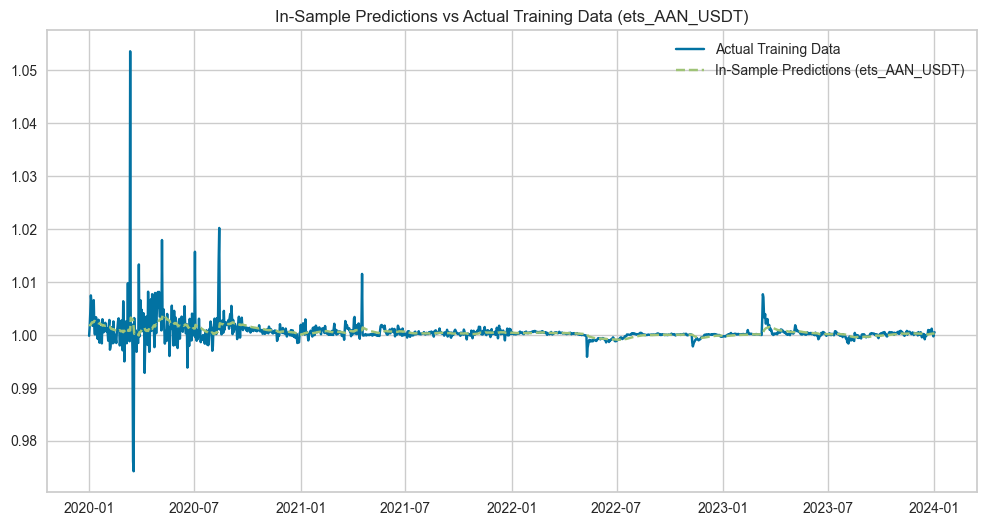

In [15]:
# Plotting in-sample predictions vs actual training data
plt.figure(figsize=(12, 6))

# Convert PeriodIndex to DatetimeIndex for plotting - ACTUAL DATA INDEX
actual_train_index_dt = exp_USDT.get_config('y_train').index.to_timestamp()

# Convert PeriodIndex to DatetimeIndex for plotting - PREDICTION INDEX
prediction_index_dt = in_sample_predictions_ets_AAN_USDT.index.to_timestamp()


plt.plot(actual_train_index_dt, exp_USDT.get_config('y_train'), label='Actual Training Data')
plt.plot(prediction_index_dt, in_sample_predictions_ets_AAN_USDT, label='In-Sample Predictions (ets_AAN_USDT)', linestyle='--')
plt.title('In-Sample Predictions vs Actual Training Data (ets_AAN_USDT)')
plt.legend()
plt.show()

In [16]:
# Calculate residuals: actual - predictions
residuals = train_data_USDT - in_sample_predictions_ets_AAN_USDT

# Print the first few residuals
print("\nFirst 10 residuals:")
print(residuals.head(10))



First 10 residuals:
Date
2020-01-01   -0.002120
2020-01-02   -0.000292
2020-01-03    0.002350
2020-01-04    0.005522
2020-01-05    0.003993
2020-01-06    0.000515
2020-01-07   -0.000688
2020-01-08    0.001875
2020-01-09    0.004109
2020-01-10   -0.001191
Freq: D, dtype: float64


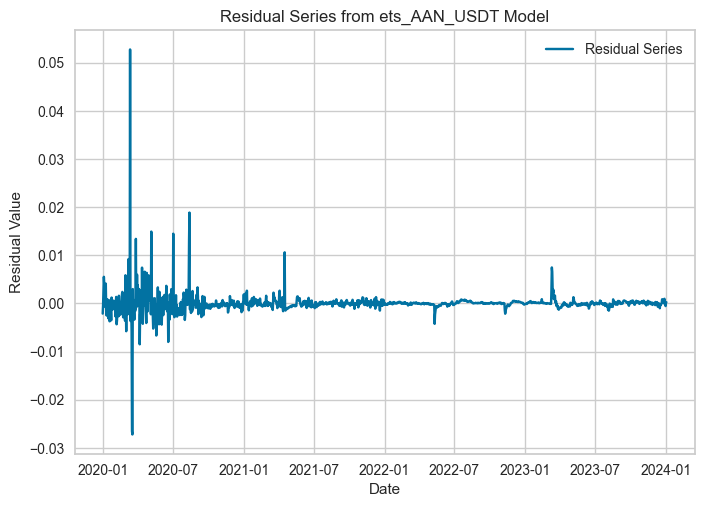

In [17]:
# Convert PeriodIndex to DatetimeIndex for plotting - RESIDUALS INDEX
residuals_index_dt = residuals.index.to_timestamp()

plt.plot(residuals_index_dt, residuals, label='Residual Series')
plt.title('Residual Series from ets_AAN_USDT Model')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [18]:
# Step 8: Perform Lag Selection using ACF on Residual Series
exp_USDT.plot_model(plot='acf',  data_kwargs={'nlags': 50}) # Analyze ACF plot to choose lags


In [20]:
# Step 9: Normalize Residual Series (Min-Max Normalization)

# Initialize MinMaxScaler with feature_range from -1 to 1 (common for ANN)
scaler_residuals = MinMaxScaler(feature_range=(-1, 1))

# Fit the scaler on the residual series and transform it
normalized_residuals = scaler_residuals.fit_transform(residuals.values.reshape(-1, 1))

# Convert the normalized numpy array back to a pandas Series, with the original index
normalized_residuals = pd.Series(normalized_residuals.flatten(), index=residuals.index)

# Print the first few normalized residuals
print("\nFirst 10 Normalized Residuals:")
print(normalized_residuals.head(10))


First 10 Normalized Residuals:
Date
2020-01-01   -0.372117
2020-01-02   -0.326396
2020-01-03   -0.260338
2020-01-04   -0.181012
2020-01-05   -0.219269
2020-01-06   -0.306239
2020-01-07   -0.336313
2020-01-08   -0.272223
2020-01-09   -0.216356
2020-01-10   -0.348897
Freq: D, dtype: float64


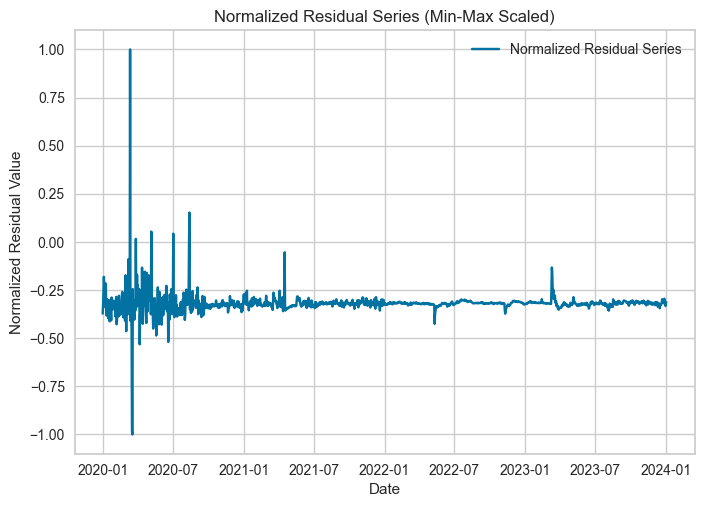

In [21]:
# --- Convert PeriodIndex to DatetimeIndex for plotting - NORMALIZED RESIDUALS INDEX ---
normalized_residuals_index_dt = normalized_residuals.index.to_timestamp()

plt.plot(normalized_residuals_index_dt, normalized_residuals, label='Normalized Residual Series')
plt.title('Normalized Residual Series (Min-Max Scaled)')
plt.xlabel('Date')
plt.ylabel('Normalized Residual Value')
plt.legend()
plt.show()


In [22]:
# --- Fill any remaining NaNs with 0 (Brute-Force NaN Handling - Before Lagging) ---
normalized_residuals.fillna(0, inplace=True) # FILL NANS WITH 0 HERE - NEW


In [38]:
# Step 10a: Prepare Data for ANN - Create Lagged Features and Target

def create_lagged_features(series, lags):
    """
    Creates lagged features from a time series.
    """
    lagged_features = {}
    for lag in lags:
        lagged_features[f'lag_{lag}'] = series.shift(lag)
    lagged_df = pd.DataFrame(lagged_features)
    return lagged_df # NO dropna() HERE ANYMORE

lags_to_use = [1, 7, 30]  # Lags based on ACF analysis

lagged_residual_features = create_lagged_features(normalized_residuals, lags_to_use)
# --- Drop NaNs RIGHT AFTER FEATURE CREATION, BEFORE SPLITTING ---
lagged_residual_features.dropna(inplace=True) # Drop NaNs NOW 

residual_target = normalized_residuals.reindex(lagged_residual_features.index)

X_train_ann = lagged_residual_features
y_train_ann = residual_target

X_train_ann_np = X_train_ann.values
y_train_ann_np = y_train_ann.values

In [24]:
# --- Data Splitting for Validation ---
from sklearn.model_selection import train_test_split
X_train_ann_train, X_val_ann, y_train_ann_train, y_val_ann = train_test_split(
    X_train_ann, y_train_ann, test_size=0.2, shuffle=False
)

X_val_ann_np = X_val_ann.values # Convert VALIDATION sets to numpy arrays 
y_val_ann_np = y_val_ann.values # Convert VALIDATION sets to numpy arrays
X_train_ann_train_np = X_train_ann_train.values # Convert TRAIN sets to numpy arrays 
y_train_ann_train_np = y_train_ann_train.values # Convert TRAIN sets to numpy arrays 

# --- Ensure Data Types are float32 (Defensive Data Handling) ---
X_train_ann_train_np = X_train_ann_train_np.astype(np.float32) # Ensure float32 data type - NEW
X_val_ann_np = X_val_ann_np.astype(np.float32) # Ensure float32 data type - NEW
y_train_ann_train_np = y_train_ann_train_np.astype(np.float32) # Ensure float32 data type - NEW
y_val_ann_np = y_val_ann_np.astype(np.float32) # Ensure float32 data type - NEW

In [39]:
# --- Manual Tuning Loop Code Block ---

neuron_options = [25, 50, 100, 150, 200]
epochs_options = [30, 50, 70, 100, 150]
batch_size_options = [16, 32, 64, 128, 256]

best_rmse = float('inf') 
best_r2 = -float('inf')
best_params_r2 = None
best_params = None

for neurons in neuron_options:
    for epochs in epochs_options:
        for batch_size in batch_size_options:
            print(f"Trying: Neurons={neurons}, Epochs={epochs}, Batch Size={batch_size}")
            
            # Build ANN model (same as before, but using current hyperparameter values)
            ann_model = Sequential()
            ann_model.add(Dense(neurons, activation='relu', input_shape=(X_train_ann_train_np.shape[1],))) # Use _train_np shape
            ann_model.add(Dense(25, activation='relu'))
            ann_model.add(Dense(1))
            ann_model.compile(optimizer=Adam(learning_rate=0.001), loss='mse') # Use legacy Adam optimizer - NEW
            
            # Train model (using *smaller* training set: X_train_ann_train_np, y_train_ann_train_np)
            ann_model.fit(X_train_ann_train_np, y_train_ann_train_np, epochs=epochs, batch_size=batch_size, verbose=0)
            
            # --- NaN Check 3: Right Before Prediction (Defensive Check) ---
            print(f"NaNs in X_val_ann_np BEFORE prediction: {np.isnan(X_val_ann_np).any()}") # ADDED CHECK AGAIN - RIGHT BEFORE PREDICT

            # Evaluate on VALIDATION set (using X_val_ann_np, y_val_ann_np - NO NaNs now)
            validation_predictions = ann_model.predict(X_val_ann_np).flatten() 
            rmse = np.sqrt(mean_squared_error(y_val_ann_np, validation_predictions)) 
            r2 = r2_score(y_val_ann_np, validation_predictions)
            print(f"  Validation RMSE: {rmse:.4f}, R²: {r2:.4f}")

            if rmse < best_rmse: 
                best_rmse = rmse
                best_params = {'neurons': neurons, 'epochs': epochs, 'batch_size': batch_size}
            if r2 > best_r2:
                best_r2 = r2
                best_params_r2 = {'neurons': neurons, 'epochs': epochs, 'batch_size': batch_size}

print("\nBest Hyperparameters found (based on Validation RMSE):")
print(best_params)
print(f"Best Validation RMSE: {best_rmse:.4f}")

print("\nBest Hyperparameters found (based on Validation R²):")
print(best_params_r2)
print(f"Best Validation R²: {best_r2:.4f}")

Trying: Neurons=25, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 417us/step


  Validation RMSE: 0.2047, R²: 0.0000
Trying: Neurons=25, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 383us/step


  Validation RMSE: 0.2352, R²: 0.0000
Trying: Neurons=25, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 395us/step


  Validation RMSE: 0.2126, R²: 0.0000
Trying: Neurons=25, Epochs=30, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 392us/step


  Validation RMSE: 0.2008, R²: 0.0000
Trying: Neurons=25, Epochs=30, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 379us/step


  Validation RMSE: 0.1798, R²: 0.0000
Trying: Neurons=25, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 375us/step


  Validation RMSE: 0.2185, R²: 0.0000
Trying: Neurons=25, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 365us/step


  Validation RMSE: 0.2681, R²: 0.0000
Trying: Neurons=25, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 388us/step


  Validation RMSE: 0.1681, R²: 0.0000
Trying: Neurons=25, Epochs=50, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 370us/step


  Validation RMSE: 0.1907, R²: 0.0000
Trying: Neurons=25, Epochs=50, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 345us/step


  Validation RMSE: 0.1910, R²: 0.0000
Trying: Neurons=25, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 385us/step


  Validation RMSE: 0.1202, R²: 0.0000
Trying: Neurons=25, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 359us/step


  Validation RMSE: 0.2525, R²: 0.0000
Trying: Neurons=25, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 375us/step


  Validation RMSE: 0.2381, R²: 0.0000
Trying: Neurons=25, Epochs=70, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 361us/step


  Validation RMSE: 0.1557, R²: 0.0000
Trying: Neurons=25, Epochs=70, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 460us/step


  Validation RMSE: 0.1873, R²: 0.0000
Trying: Neurons=25, Epochs=100, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 363us/step


  Validation RMSE: 0.2099, R²: 0.0000
Trying: Neurons=25, Epochs=100, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 348us/step


  Validation RMSE: 0.1654, R²: 0.0000
Trying: Neurons=25, Epochs=100, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 370us/step


  Validation RMSE: 0.1487, R²: 0.0000
Trying: Neurons=25, Epochs=100, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 512us/step


  Validation RMSE: 0.1950, R²: 0.0000
Trying: Neurons=25, Epochs=100, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 404us/step


  Validation RMSE: 0.1915, R²: 0.0000
Trying: Neurons=25, Epochs=150, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 407us/step


  Validation RMSE: 0.1651, R²: 0.0000
Trying: Neurons=25, Epochs=150, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 552us/step


  Validation RMSE: 0.2427, R²: 0.0000
Trying: Neurons=25, Epochs=150, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 373us/step


  Validation RMSE: 0.1089, R²: 0.0000
Trying: Neurons=25, Epochs=150, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 505us/step


  Validation RMSE: 0.2433, R²: 0.0000
Trying: Neurons=25, Epochs=150, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 799us/step


  Validation RMSE: 0.2923, R²: 0.0000
Trying: Neurons=50, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 383us/step


  Validation RMSE: 0.1689, R²: 0.0000
Trying: Neurons=50, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 361us/step


  Validation RMSE: 0.1658, R²: 0.0000
Trying: Neurons=50, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 377us/step


  Validation RMSE: 0.1909, R²: 0.0000
Trying: Neurons=50, Epochs=30, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 324us/step


  Validation RMSE: 0.1653, R²: 0.0000
Trying: Neurons=50, Epochs=30, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 343us/step


  Validation RMSE: 0.1543, R²: 0.0000
Trying: Neurons=50, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 346us/step


  Validation RMSE: 0.2314, R²: 0.0000
Trying: Neurons=50, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 364us/step


  Validation RMSE: 0.1673, R²: 0.0000
Trying: Neurons=50, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 366us/step


  Validation RMSE: 0.2654, R²: 0.0000
Trying: Neurons=50, Epochs=50, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 349us/step


  Validation RMSE: 0.2188, R²: 0.0000
Trying: Neurons=50, Epochs=50, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 349us/step


  Validation RMSE: 0.1724, R²: 0.0000
Trying: Neurons=50, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 355us/step


  Validation RMSE: 0.2316, R²: 0.0000
Trying: Neurons=50, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 349us/step


  Validation RMSE: 0.1582, R²: 0.0000
Trying: Neurons=50, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 345us/step


  Validation RMSE: 0.2010, R²: 0.0000
Trying: Neurons=50, Epochs=70, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 361us/step


  Validation RMSE: 0.2094, R²: 0.0000
Trying: Neurons=50, Epochs=70, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 340us/step


  Validation RMSE: 0.1718, R²: 0.0000
Trying: Neurons=50, Epochs=100, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 482us/step


  Validation RMSE: 0.1595, R²: 0.0000
Trying: Neurons=50, Epochs=100, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 422us/step


  Validation RMSE: 0.2546, R²: 0.0000
Trying: Neurons=50, Epochs=100, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 445us/step


  Validation RMSE: 0.1638, R²: 0.0000
Trying: Neurons=50, Epochs=100, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 384us/step


  Validation RMSE: 0.2377, R²: 0.0000
Trying: Neurons=50, Epochs=100, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 438us/step


  Validation RMSE: 0.2422, R²: 0.0000
Trying: Neurons=50, Epochs=150, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 404us/step


  Validation RMSE: 0.2137, R²: 0.0000
Trying: Neurons=50, Epochs=150, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 356us/step


  Validation RMSE: 0.3091, R²: 0.0000
Trying: Neurons=50, Epochs=150, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 363us/step


  Validation RMSE: 0.2312, R²: 0.0000
Trying: Neurons=50, Epochs=150, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 364us/step


  Validation RMSE: 0.1342, R²: 0.0000
Trying: Neurons=50, Epochs=150, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 363us/step


  Validation RMSE: 0.1973, R²: 0.0000
Trying: Neurons=100, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 348us/step


  Validation RMSE: 0.1945, R²: 0.0000
Trying: Neurons=100, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 363us/step


  Validation RMSE: 0.1818, R²: 0.0000
Trying: Neurons=100, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 371us/step


  Validation RMSE: 0.2047, R²: 0.0000
Trying: Neurons=100, Epochs=30, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 368us/step


  Validation RMSE: 0.2037, R²: 0.0000
Trying: Neurons=100, Epochs=30, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 370us/step


  Validation RMSE: 0.1668, R²: 0.0000
Trying: Neurons=100, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 352us/step


  Validation RMSE: 0.1918, R²: 0.0000
Trying: Neurons=100, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 359us/step


  Validation RMSE: 0.1693, R²: 0.0000
Trying: Neurons=100, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 349us/step


  Validation RMSE: 0.1802, R²: 0.0000
Trying: Neurons=100, Epochs=50, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 358us/step


  Validation RMSE: 0.1610, R²: 0.0000
Trying: Neurons=100, Epochs=50, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 358us/step


  Validation RMSE: 0.1827, R²: 0.0000
Trying: Neurons=100, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 445us/step


  Validation RMSE: 0.2208, R²: 0.0000
Trying: Neurons=100, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 1s 2ms/step


  Validation RMSE: 0.2462, R²: 0.0000
Trying: Neurons=100, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 374us/step


  Validation RMSE: 0.1677, R²: 0.0000
Trying: Neurons=100, Epochs=70, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 404us/step


  Validation RMSE: 0.1684, R²: 0.0000
Trying: Neurons=100, Epochs=70, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 369us/step


  Validation RMSE: 0.1354, R²: 0.0000
Trying: Neurons=100, Epochs=100, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 410us/step


  Validation RMSE: 0.2018, R²: 0.0000
Trying: Neurons=100, Epochs=100, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 388us/step


  Validation RMSE: 0.3088, R²: 0.0000
Trying: Neurons=100, Epochs=100, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 888us/step


  Validation RMSE: 0.1500, R²: 0.0000
Trying: Neurons=100, Epochs=100, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 375us/step


  Validation RMSE: 0.2478, R²: 0.0000
Trying: Neurons=100, Epochs=100, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 504us/step


  Validation RMSE: 0.2300, R²: 0.0000
Trying: Neurons=100, Epochs=150, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 441us/step


  Validation RMSE: 0.1802, R²: 0.0000
Trying: Neurons=100, Epochs=150, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 378us/step


  Validation RMSE: 0.2664, R²: 0.0000
Trying: Neurons=100, Epochs=150, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 386us/step


  Validation RMSE: 0.2930, R²: 0.0000
Trying: Neurons=100, Epochs=150, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 463us/step


  Validation RMSE: 0.2075, R²: 0.0000
Trying: Neurons=100, Epochs=150, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 365us/step


  Validation RMSE: 0.1546, R²: 0.0000
Trying: Neurons=150, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 756us/step


  Validation RMSE: 0.1780, R²: 0.0000
Trying: Neurons=150, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 1ms/step


  Validation RMSE: 0.1699, R²: 0.0000
Trying: Neurons=150, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 1ms/step


  Validation RMSE: 0.2013, R²: 0.0000
Trying: Neurons=150, Epochs=30, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 382us/step


  Validation RMSE: 0.1930, R²: 0.0000
Trying: Neurons=150, Epochs=30, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 536us/step


  Validation RMSE: 0.1314, R²: 0.0000
Trying: Neurons=150, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 518us/step


  Validation RMSE: 0.2244, R²: 0.0000
Trying: Neurons=150, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 389us/step


  Validation RMSE: 0.1831, R²: 0.0000
Trying: Neurons=150, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 487us/step


  Validation RMSE: 0.1480, R²: 0.0000
Trying: Neurons=150, Epochs=50, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 465us/step


  Validation RMSE: 0.1797, R²: 0.0000
Trying: Neurons=150, Epochs=50, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 400us/step


  Validation RMSE: 0.1995, R²: 0.0000
Trying: Neurons=150, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 458us/step


  Validation RMSE: 0.2076, R²: 0.0000
Trying: Neurons=150, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 370us/step


  Validation RMSE: 0.2222, R²: 0.0000
Trying: Neurons=150, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 382us/step


  Validation RMSE: 0.2463, R²: 0.0000
Trying: Neurons=150, Epochs=70, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 387us/step


  Validation RMSE: 0.2132, R²: 0.0000
Trying: Neurons=150, Epochs=70, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 438us/step


  Validation RMSE: 0.2584, R²: 0.0000
Trying: Neurons=150, Epochs=100, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 462us/step


  Validation RMSE: 0.2461, R²: 0.0000
Trying: Neurons=150, Epochs=100, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 371us/step


  Validation RMSE: 0.2870, R²: 0.0000
Trying: Neurons=150, Epochs=100, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 386us/step


  Validation RMSE: 0.2020, R²: 0.0000
Trying: Neurons=150, Epochs=100, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 364us/step


  Validation RMSE: 0.1894, R²: 0.0000
Trying: Neurons=150, Epochs=100, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 379us/step


  Validation RMSE: 0.1764, R²: 0.0000
Trying: Neurons=150, Epochs=150, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 369us/step


  Validation RMSE: 0.3519, R²: 0.0000
Trying: Neurons=150, Epochs=150, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 366us/step


  Validation RMSE: 0.2355, R²: 0.0000
Trying: Neurons=150, Epochs=150, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 367us/step


  Validation RMSE: 0.1291, R²: 0.0000
Trying: Neurons=150, Epochs=150, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 378us/step


  Validation RMSE: 0.1926, R²: 0.0000
Trying: Neurons=150, Epochs=150, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 377us/step


  Validation RMSE: 0.2569, R²: 0.0000
Trying: Neurons=200, Epochs=30, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 398us/step


  Validation RMSE: 0.1673, R²: 0.0000
Trying: Neurons=200, Epochs=30, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 387us/step


  Validation RMSE: 0.2337, R²: 0.0000
Trying: Neurons=200, Epochs=30, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 817us/step


  Validation RMSE: 0.2145, R²: 0.0000
Trying: Neurons=200, Epochs=30, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 400us/step


  Validation RMSE: 0.1717, R²: 0.0000
Trying: Neurons=200, Epochs=30, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 588us/step


  Validation RMSE: 0.1377, R²: 0.0000
Trying: Neurons=200, Epochs=50, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 438us/step


  Validation RMSE: 0.2000, R²: 0.0000
Trying: Neurons=200, Epochs=50, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 368us/step


  Validation RMSE: 0.1977, R²: 0.0000
Trying: Neurons=200, Epochs=50, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 381us/step


  Validation RMSE: 0.1990, R²: 0.0000
Trying: Neurons=200, Epochs=50, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 367us/step


  Validation RMSE: 0.1845, R²: 0.0000
Trying: Neurons=200, Epochs=50, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 360us/step


  Validation RMSE: 0.2015, R²: 0.0000
Trying: Neurons=200, Epochs=70, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 366us/step


  Validation RMSE: 0.2672, R²: 0.0000
Trying: Neurons=200, Epochs=70, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 427us/step


  Validation RMSE: 0.2183, R²: 0.0000
Trying: Neurons=200, Epochs=70, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 390us/step


  Validation RMSE: 0.1849, R²: 0.0000
Trying: Neurons=200, Epochs=70, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 425us/step


  Validation RMSE: 0.1793, R²: 0.0000
Trying: Neurons=200, Epochs=70, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 369us/step


  Validation RMSE: 0.1806, R²: 0.0000
Trying: Neurons=200, Epochs=100, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 442us/step


  Validation RMSE: 0.2650, R²: 0.0000
Trying: Neurons=200, Epochs=100, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 500us/step


  Validation RMSE: 0.2264, R²: 0.0000
Trying: Neurons=200, Epochs=100, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 388us/step


  Validation RMSE: 0.2278, R²: 0.0000
Trying: Neurons=200, Epochs=100, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 421us/step


  Validation RMSE: 0.2009, R²: 0.0000
Trying: Neurons=200, Epochs=100, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 381us/step


  Validation RMSE: 0.2448, R²: 0.0000
Trying: Neurons=200, Epochs=150, Batch Size=16
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 386us/step


  Validation RMSE: 0.3335, R²: 0.0000
Trying: Neurons=200, Epochs=150, Batch Size=32
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 362us/step


  Validation RMSE: 0.2107, R²: 0.0000
Trying: Neurons=200, Epochs=150, Batch Size=64
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 364us/step


  Validation RMSE: 0.2205, R²: 0.0000
Trying: Neurons=200, Epochs=150, Batch Size=128
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 392us/step


  Validation RMSE: 0.3352, R²: 0.0000
Trying: Neurons=200, Epochs=150, Batch Size=256
NaNs in X_val_ann_np BEFORE prediction: False
12/12 [==============================] - 0s 546us/step
  Validation RMSE: 0.1957, R²: 0.0000

Best Hyperparameters found (based on Validation RMSE):
{'neurons': 25, 'epochs': 150, 'batch_size': 64}
Best Validation RMSE: 0.1089

Best Hyperparameters found (based on Validation R²):
{'neurons': 25, 'epochs': 30, 'batch_size': 16}
Best Validation R²: 0.0000


In [40]:
# Best Hyperparameters from Tuning (replace with your best values if different)
best_neurons = 25
best_epochs = 150
best_batch_size = 64

# 1. Build the Final ANN Model with Best Hyperparameters
final_ann_model = Sequential()
final_ann_model.add(Dense(best_neurons, activation='relu', input_shape=(X_train_ann_np.shape[1],))) # Best neurons for layer 1
final_ann_model.add(Dense(25, activation='relu')) # You can keep layer 2 as before
final_ann_model.add(Dense(1))

# 2. Compile the Final ANN Model
optimizer = Adam(learning_rate=0.001) # You can keep learning rate as before, or tune it too
final_ann_model.compile(optimizer=optimizer, loss='mse')

# 3. Train the Final ANN Model (on FULL training data: X_train_ann_np, y_train_ann_np)
final_ann_model.fit(X_train_ann_np, y_train_ann_np, epochs=best_epochs, batch_size=best_batch_size, verbose=0) # Use best epochs, batch_size

# 4. Print Model Summary of the Final Model
final_ann_model.summary()

print("\nFinal ANN Model Retraining Complete (with Best Hyperparameters)!")

Model: "sequential_251"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_753 (Dense)           (None, 25)                100       
                                                                 
 dense_754 (Dense)           (None, 25)                650       
                                                                 
 dense_755 (Dense)           (None, 1)                 26        
                                                                 
Total params: 776
Trainable params: 776
Non-trainable params: 0
_________________________________________________________________

Final ANN Model Retraining Complete (with Best Hyperparameters)!



First 10 De-normalized In-Sample ANN Residual Predictions:
Date
2020-01-31    0.000614
2020-02-01   -0.000562
2020-02-02   -0.000564
2020-02-03   -0.000766
2020-02-04   -0.001420
2020-02-05   -0.000046
2020-02-06    0.000513
2020-02-07   -0.002004
2020-02-08   -0.001757
2020-02-09   -0.001018
Freq: D, dtype: float32


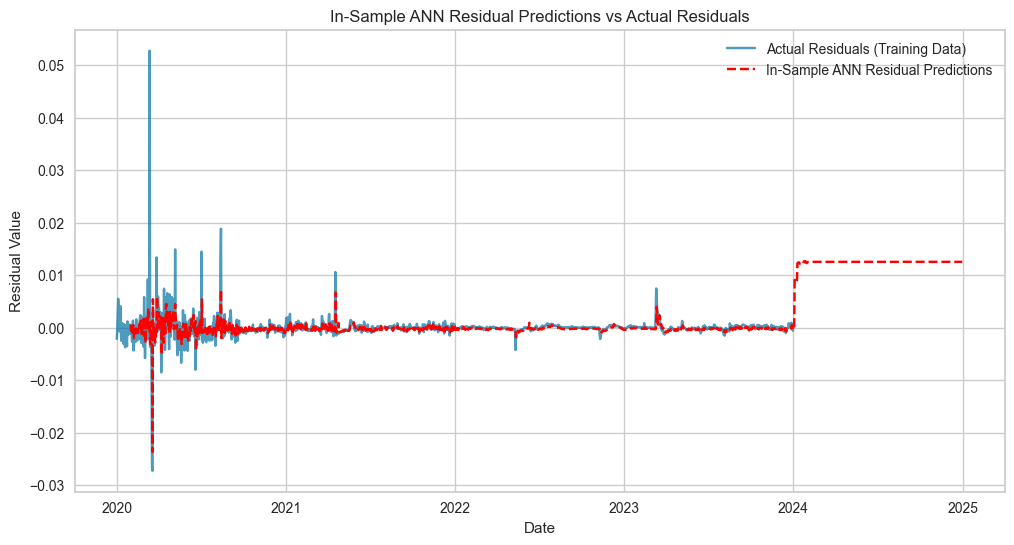

In [41]:
# Step 10 (Continued): Obtain In-Sample ANN Residual Predictions

# Use the trained final_ann_model to predict in-sample residuals

# 1. Prepare Input Features (already have X_train_ann_np from Step 10a)
#    X_train_ann_np (numpy array of lagged features for training data) is ready to use.

# 2. Generate In-Sample ANN Residual Predictions (Normalized)
ann_predictions_insample_normalized = final_ann_model.predict(X_train_ann_np, verbose=0).flatten()
ann_predictions_insample_normalized = pd.Series(ann_predictions_insample_normalized, index=X_train_ann.index)

# 3. De-normalize ANN Predictions (back to original residual scale)
ann_predictions_insample_denormalized = scaler_residuals.inverse_transform(ann_predictions_insample_normalized.values.reshape(-1, 1)).flatten()
ann_predictions_insample_denormalized = pd.Series(ann_predictions_insample_denormalized, index=ann_predictions_insample_normalized.index)

# 4. Print a sample of de-normalized in-sample ANN predictions
print("\nFirst 10 De-normalized In-Sample ANN Residual Predictions:")
print(ann_predictions_insample_denormalized.head(10))

# 5. Plotting In-Sample ANN Residual Predictions vs Actual Residuals (Optional)
plt.figure(figsize=(12, 6))
plt.plot(residuals.index.to_timestamp(), residuals, label='Actual Residuals (Training Data)', alpha=0.7) # Actual residuals
plt.plot(ann_predictions_insample_denormalized.index.to_timestamp(), ann_predictions_insample_denormalized, label='In-Sample ANN Residual Predictions', linestyle='--', color='red') # ANN predictions
plt.title('In-Sample ANN Residual Predictions vs Actual Residuals')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()


First 10 De-normalized Hold-out ANN Residual Predictions:
Date
2024-01-03    0.012548
2024-01-04    0.012381
2024-01-05    0.012249
2024-01-06    0.012145
2024-01-07    0.012062
2024-01-08    0.011980
2024-01-09    0.011895
2024-01-10    0.011678
2024-01-11    0.011346
2024-01-12    0.010915
Freq: D, dtype: float32


,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.4506,0.2132,0.0005,0.0006,0.0005,0.0005,-0.0137


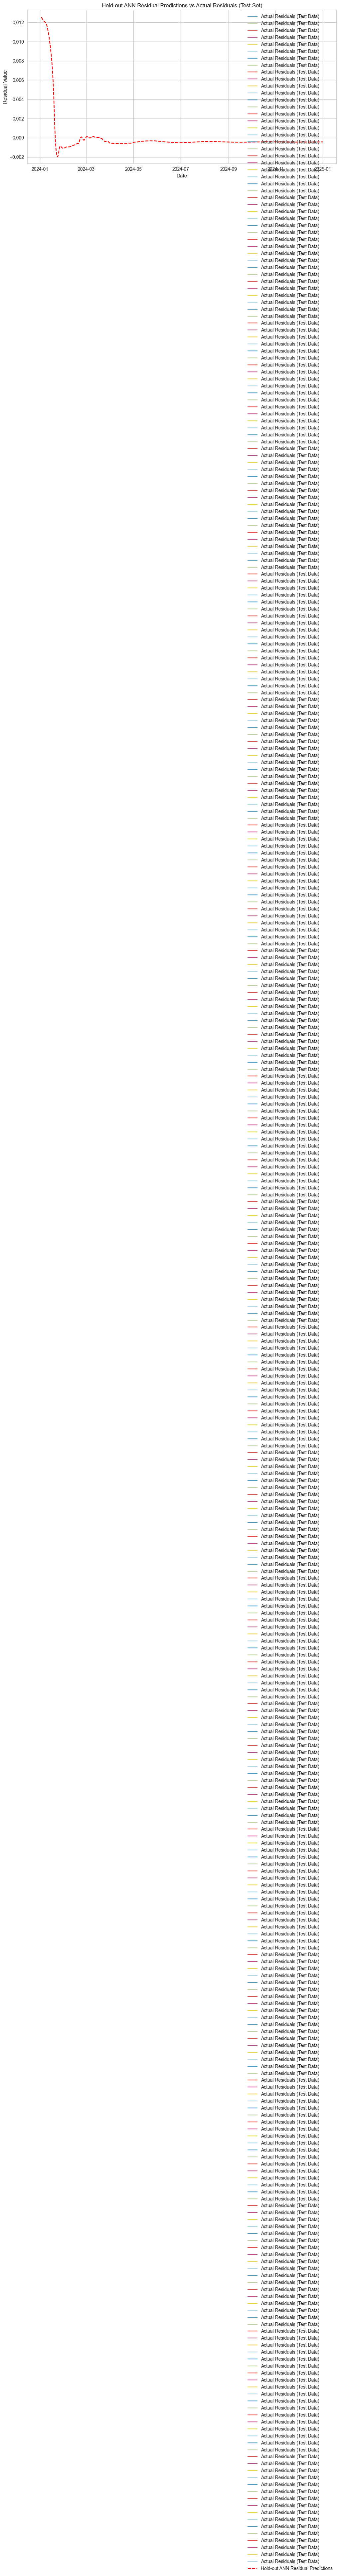

In [42]:
# Step 10 (Continued): Obtain Hold-out (Test Set) ANN Residual Predictions

# 1. Prepare for Iterative Forecast - Get last training residuals as initial history
last_train_residuals_normalized = normalized_residuals.tail(max(lags_to_use)).values # Last 'max_lag' residuals from training set (normalized)
ann_predictions_holdout_normalized = [] # List to store forecasted normalized residuals for hold-out period
current_residuals_history = list(last_train_residuals_normalized) # Initialize history with last training residuals

# 2. Iterative (Recursive) Forecast Loop - for each step in forecast horizon (fh)
forecast_horizon = len(exp_USDT.get_config('y_test')) # Length of forecast horizon (test set)

for _ in range(forecast_horizon): # Iterate for each step in forecast horizon
    
    # a. Create feature vector from current residual history
    feature_vector = np.array([current_residuals_history[-lag] for lag in lags_to_use]).reshape(1, -1) # Get lagged residuals from history
    
    # b. Predict next residual (normalized) using trained ANN model
    next_residual_normalized = final_ann_model.predict(feature_vector, verbose=0).flatten()[0] # Predict 1 step ahead
    ann_predictions_holdout_normalized.append(next_residual_normalized) # Append prediction to forecast list
    
    # c. Update residual history for next iteration - append predicted residual and remove oldest
    current_residuals_history.append(next_residual_normalized) # Append PREDICTED residual to history
    current_residuals_history.pop(0) # Remove the oldest residual from history (to keep history length constant)

# 3. Convert ANN Hold-out Predictions to Pandas Series with Test Set Index
ann_predictions_holdout_normalized = pd.Series(ann_predictions_holdout_normalized, index=exp_USDT.get_config('y_test').index)

# 4. De-normalize ANN Hold-out Predictions (back to original residual scale)
ann_predictions_holdout_denormalized = scaler_residuals.inverse_transform(np.array(ann_predictions_holdout_normalized).reshape(-1, 1)).flatten()
ann_predictions_holdout_denormalized = pd.Series(ann_predictions_holdout_denormalized, index=ann_predictions_holdout_normalized.index)

# 5. Print sample of de-normalized hold-out ANN residual predictions
print("\nFirst 10 De-normalized Hold-out ANN Residual Predictions:")
print(ann_predictions_holdout_denormalized.head(10))

# --- Step: Obtain ETS Hold-out Predictions (for plotting) ---
ets_predictions_holdout = exp_USDT.predict_model(ets_AAN_USDT)

# Ensure the index of ETS hold-out predictions is a DatetimeIndex for plotting
if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# 6. Plotting Hold-out ANN Residual Predictions vs Actual Residuals (Test Set) - Optional
plt.figure(figsize=(12, 6))
plt.plot(exp_USDT.get_config('y_test').index.to_timestamp(), exp_USDT.get_config('y_test') - ets_predictions_holdout, label='Actual Residuals (Test Data)', alpha=0.7) # Actual test residuals (calculated)
plt.plot(ann_predictions_holdout_denormalized.index.to_timestamp(), ann_predictions_holdout_denormalized, label='Hold-out ANN Residual Predictions', linestyle='--', color='red') # ANN holdout predictions
plt.title('Hold-out ANN Residual Predictions vs Actual Residuals (Test Set)')
plt.xlabel('Date')
plt.ylabel('Residual Value')
plt.legend()
plt.show()

In [43]:
# --- Insert this code block to replace the original summary statistics printing ---

# Print summary statistics (min, max, mean, std) for actual test residuals
y_test_USDT_datetime_index = y_test_USDT.copy() # Create a copy to avoid modifying original y_test_USDT
y_test_USDT_datetime_index.index = y_test_USDT_datetime_index.index.to_timestamp() # Convert PeriodIndex to DatetimeIndex

actual_test_residuals_series = y_test_USDT_datetime_index - ets_predictions_holdout['y_pred'] # Use y_test_USDT_datetime_index here

print("\nSummary Statistics - Actual Test Set Residuals (DatetimeIndex):")
print(actual_test_residuals_series.describe())

# Print summary statistics for de-normalized ANN hold-out predictions (no change needed here)
print("\nSummary Statistics - De-normalized ANN Hold-out Predictions:")
print(ann_predictions_holdout_denormalized.describe())


Summary Statistics - Actual Test Set Residuals (DatetimeIndex):
count    365.000000
mean      -0.000077
std        0.000644
min       -0.001963
25%       -0.000395
50%       -0.000067
75%        0.000251
max        0.002324
dtype: float64

Summary Statistics - De-normalized ANN Hold-out Predictions:
count    365.000000
mean       0.000049
std        0.002334
min       -0.001992
25%       -0.000470
50%       -0.000440
75%       -0.000395
max        0.012548
dtype: float64


In [44]:
print("\nHead of ets_predictions_holdout DataFrame:")
print(ets_predictions_holdout.head())
print("\nInfo of ets_predictions_holdout DataFrame:")
ets_predictions_holdout.info()


Head of ets_predictions_holdout DataFrame:
            y_pred
2024-01-03  1.0003
2024-01-04  1.0003
2024-01-05  1.0003
2024-01-06  1.0003
2024-01-07  1.0003

Info of ets_predictions_holdout DataFrame:
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   y_pred  365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [45]:
print("\nHead of y_test_USDT DataFrame:")
print(y_test_USDT.head())
print("\nInfo of y_test_USDT DataFrame:")
y_test_USDT.info()



Head of y_test_USDT DataFrame:
Date
2024-01-03    1.000657
2024-01-04    1.001032
2024-01-05    1.000877
2024-01-06    1.000592
2024-01-07    1.000607
Freq: D, Name: Close, dtype: float64

Info of y_test_USDT DataFrame:
<class 'pandas.core.series.Series'>
PeriodIndex: 365 entries, 2024-01-03 to 2025-01-01
Freq: D
Series name: Close
Non-Null Count  Dtype  
--------------  -----  
365 non-null    float64
dtypes: float64(1)
memory usage: 5.7 KB


In [46]:
# Re-run Step 5b: Obtain Hold-out (Test Set) Predictions from Best ETS Model
ets_predictions_holdout = exp_USDT.predict_model(ets_AAN_USDT) 

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.4506,0.2132,0.0005,0.0006,0.0005,0.0005,-0.0137


In [47]:
# Calculate residuals: actual - predictions
residuals = train_data_USDT - in_sample_predictions_ets_AAN_USDT


In [48]:
# --- Step 12: Combine ETS and ANN Predictions for Final Hybrid Forecasts ---

# Get ETS hold-out predictions (if you haven't already calculated them)
ets_predictions_holdout = exp_USDT.predict_model(ets_AAN_USDT)

# Combine ETS predictions and ANN residual predictions for final hybrid hold-out forecasts
final_predictions_holdout_hybrid = ets_predictions_holdout['y_pred'] + ann_predictions_holdout_denormalized

# Print the first few final hybrid hold-out forecasts
print("\nFirst 10 Final Hybrid Hold-out Forecasts:")
print(final_predictions_holdout_hybrid.head(10))

,Model,MASE,RMSSE,MAE,RMSE,MAPE,SMAPE,R2
0,ETS,0.4506,0.2132,0.0005,0.0006,0.0005,0.0005,-0.0137



First 10 Final Hybrid Hold-out Forecasts:
2024-01-03    1.012848
2024-01-04    1.012681
2024-01-05    1.012549
2024-01-06    1.012445
2024-01-07    1.012362
2024-01-08    1.012280
2024-01-09    1.012195
2024-01-10    1.011978
2024-01-11    1.011646
2024-01-12    1.011215
Freq: D, dtype: float64


In [49]:
def ts_metrics(y, y_hat):
    """
    Calculate and display time series evaluation metrics.
    
    Parameters:
    y (array-like): Actual values
    y_hat (array-like): Predicted values
    
    Returns:
    dict: A dictionary containing all calculated metrics
    """
    # Calculate metrics
    mae = mean_absolute_error(y, y_hat)
    mape = mean_absolute_percentage_error(y, y_hat)
    rmse = np.sqrt(mean_squared_error(y, y_hat))
    r2 = r2_score(y, y_hat)
    
    
    # Store metrics in a dictionary
    metrics = {
        'MAE': mae,
        'MAPE': mape,
        'RMSE': rmse,
        'R2': r2,
    }
    
    # Print metrics with descriptions
    print("Time Series Model Evaluation Metrics:")
    print("-" * 40)
    print(f"Mean Absolute Error (MAE): {mae:.4f}")
    print(f"Mean Absolute Percentage Error (MAPE): {mape:.4%}")
    print(f"Root Mean Squared Error (RMSE): {rmse:.4f}")
    print(f"R-squared (R²): {r2:.4f}")
    
    return 

In [50]:
# --- Step 13: Evaluate Hybrid Model Performance on Hold-out Set ---
print("\n--- Hybrid Model Evaluation Metrics (Hold-out Set) ---")
ts_metrics(exp_USDT.get_config('y_test'), final_predictions_holdout_hybrid) # Use ts_metrics function to evaluate




--- Hybrid Model Evaluation Metrics (Hold-out Set) ---
Time Series Model Evaluation Metrics:
----------------------------------------
Mean Absolute Error (MAE): 0.0011
Mean Absolute Percentage Error (MAPE): 0.1082%
Root Mean Squared Error (RMSE): 0.0024
R-squared (R²): -13.1369


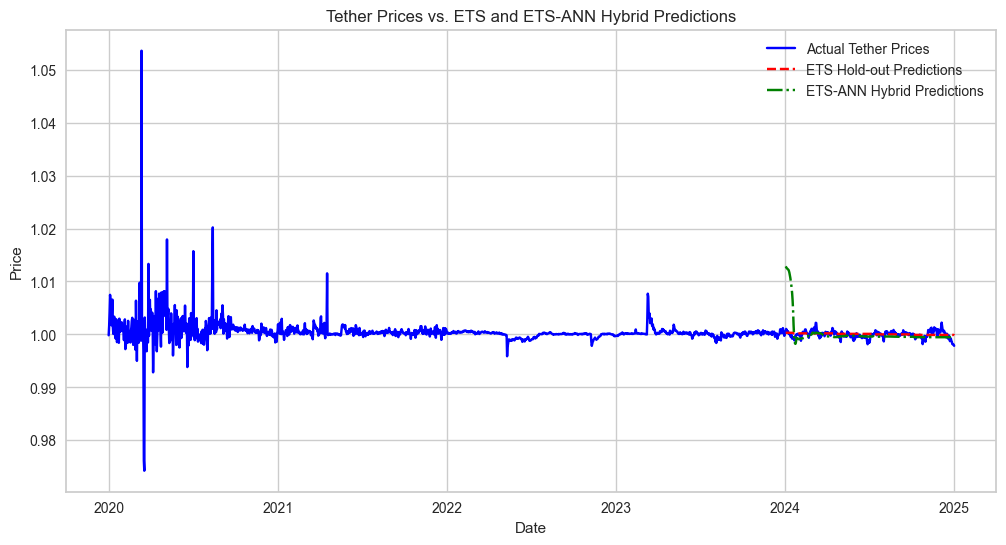

In [51]:
# Ensure correct index type for plotting
if isinstance(df_USDT.index, pd.PeriodIndex):
    df_USDT.index = df_USDT.index.to_timestamp()

if isinstance(ets_predictions_holdout.index, pd.PeriodIndex):
    ets_predictions_holdout.index = ets_predictions_holdout.index.to_timestamp()

# Ensure df_USDT is a DataFrame and contains the 'Close' column
if isinstance(df_USDT, pd.Series):
    df_USDT = df_USDT.to_frame(name='Close')

plt.figure(figsize=(12, 6))

# Plot Actual Tether Prices (Full Data)
if isinstance(df_USDT, pd.DataFrame) and 'Close' in df_USDT.columns:
    plt.plot(df_USDT.index, df_USDT['Close'], label='Actual Tether Prices', color='blue')
else:
    print("Error: 'Close' column not found in df_USDT DataFrame")

# Plot ETS Hold-out Predictions
if isinstance(ets_predictions_holdout, pd.DataFrame) and 'y_pred' in ets_predictions_holdout.columns:
    plt.plot(ets_predictions_holdout.index, ets_predictions_holdout['y_pred'], label='ETS Hold-out Predictions', color='red', linestyle='--')
else:
    print("Error: 'y_pred' column not found in ets_predictions_holdout DataFrame")

# Plot ETS-ANN Hybrid Predictions
if isinstance(final_predictions_holdout_hybrid, pd.Series):
    plt.plot(final_predictions_holdout_hybrid.index, final_predictions_holdout_hybrid, label='ETS-ANN Hybrid Predictions', color='green', linestyle='-.')
else:
    print("Error: final_predictions_holdout_hybrid is not a Series")

plt.title('Tether Prices vs. ETS and ETS-ANN Hybrid Predictions')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()